The class Statement

class statement is an object builder, and an implicit assignment—when run, it generates a class object and stores a reference to it in the name used in the header

General Form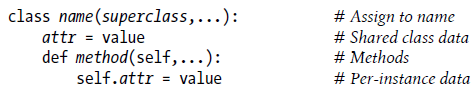

In [1]:
class SharedData:
  spam = 42 # Generates a class data attribute
x = SharedData() # Make two instances
y = SharedData()
x.spam, y.spam # They inherit and share 'spam' ( SharedData.spam)

(42, 42)

In [2]:
SharedData.spam = 99
x.spam, y.spam, SharedData.spam

(99, 99, 99)

In [3]:
x.spam = 88
x.spam, y.spam, SharedData.spam

(88, 99, 99)

In [4]:
class MixedNames: # Define class
  data = 'spam' # Assign class attr
  def __init__(self, value): # Assign method name
    self.data = value # Assign instance attr
  def display(self):
    print(self.data, MixedNames.data) # Instance attr, class attr

In [6]:
x = MixedNames(1) # Make two instance objects
y = MixedNames(2) # Each has its own data
x.display(); y.display() # self.data differs, MixedNames.data is the same


1 spam
2 spam


Methods

Python automatically maps instance method calls to a class’s method functions as follows
      *instance.method(args...)*

are automatically translated to class method function calls of this form:

*class.method(instance, args...)*

In [7]:
class NextClass: # Define class
   def printer(self, text): # Define method
       self.message = text # Change instance
       print(self.message) # Access instance

In [8]:
x = NextClass() # Make instance
x.printer('instance call') # Call its method


instance call


In [9]:
x.message # Instance changed

'instance call'

In [10]:
NextClass.printer(x, 'class call') # Direct class call

class call


In [11]:
x.message # Instance changed again

'class call'

Calling Superclass Constructors

In [ ]:
class Super:
  def __init__(self, x):
    ...default code...

class Sub(Super):
  def __init__(self, x, y):
   Super.__init__(self, x) # Run superclass __init__
   ...custom code... # Do my init actions


   I = Sub(1, 2)

Inheritance
Attribute Tree Construction

1. Instance attributes are generated by assignments to self attributes in methods.
2. Class attributes are created by statements (assignments) in class statements.
3. Superclass links are made by listing classes in parentheses in a class statement
header.

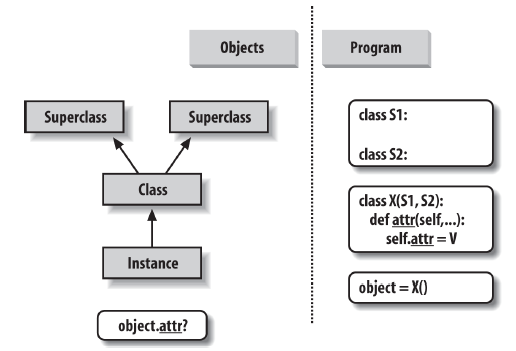

In [12]:
class Super:
 def method(self):
  print('in Super.method')

In [14]:
class Sub(Super):
 def method(self): # Override method
  print('starting Sub.method') # Add actions here
  Super.method(self) # Run default action
  print('ending Sub.method')

In [15]:
x = Super() # Make a Super instance
x.method() # Runs Super.method

in Super.method


In [16]:
x = Sub() # Make a Sub instance
x.method() # Runs Sub.method, calls Super.method

starting Sub.method
in Super.method
ending Sub.method


Class Interface Techniques
1. Super

Defines a method function and a delegate that expects an action in a subclass
2. Inheritor

Doesn’t provide any new names, so it gets everything defined in Super
3. Replacer

Overrides Super’s method with a version of its own.
4. Extender

Customizes Super’s method by overriding and calling back to run the default.
5. Provider

Implements the action method expected by Super’s delegate method

In [18]:
class Super:
  def method(self):
   print('in Super.method') # Default behavior
  def delegate(self):
   self.action() # Expected to be defined

In [19]:
class Inheritor(Super): # Inherit method verbatim
 pass

In [20]:
class Replacer(Super): # Replace method completely
 def method(self):
   print('in Replacer.method')

In [21]:
class Extender(Super): # Extend method behavior
  def method(self):
   print('starting Extender.method')
   Super.method(self)
   print('ending Extender.method')

In [22]:
class Provider(Super): # Fill in a required method
  def action(self):
    print('in Provider.action')

In [23]:
if __name__ == '__main__':
 for klass in (Inheritor, Replacer, Extender):
  print('\n' + klass.__name__ + '...')
  klass().method()
print('\nProvider...')
x = Provider()
x.delegate()


Inheritor...
in Super.method

Replacer...
in Replacer.method

Extender...
starting Extender.method
in Super.method
ending Extender.method

Provider...
in Provider.action


delegate method, the superclass in this example is what is
sometimes called an **abstract superclass**—a class that expects parts of its behavior to be
provided by its subclasses. If an expected method is not defined in a subclass, Python
raises an undefined name exception when the inheritance search fails.

assert statements, or by raising the built-in NotImplementedError exception with raise statements

In [26]:
class Super:
  def delegate(self):
   self.action()
  def action(self):
    assert False,'action must be defined!' # If this version is called



In [27]:
X = Super()
X.delegate()

AssertionError: ignored

In [28]:
class Super:
  def delegate(self):
   self.action()
  def action(self):
   raise NotImplementedError('action must be defined!')

In [29]:
X = Super()
X.delegate()

NotImplementedError: ignored

In [30]:
class Sub(Super): pass
X = Sub()
X.delegate()



NotImplementedError: ignored

In [31]:
class Sub(Super):
 def action(self): print('spam')

X = Sub()
X.delegate()

spam
